# Part 2: Bar Charts and Analyzing Data from CSVs
We'll use a dataset related to median salary of developers in a survey corresponding to the year 2019

We'll see how to produce barcharts in python and how to import data from external files since this will be the the data source in most of the cases. In this case we'll work with csv files.

To start with, we import libraries and load data that was used in the previous section

In [3]:
from matplotlib import pyplot as plt

ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

dev_y = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]

## Vertical barcharts
Instead of using `plt.plot()` as we did before, now we are going to use `plt.bar()`.

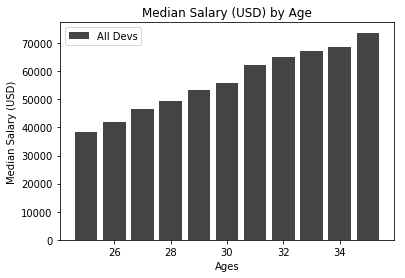

In [8]:
plt.bar(ages_x, dev_y, color='#444444', label='All Devs')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.legend()
plt.show()

 What if we also want to include the median salaries for python and javascript developers? One option is overlapping the lines we saw in the previous section on the barplot.

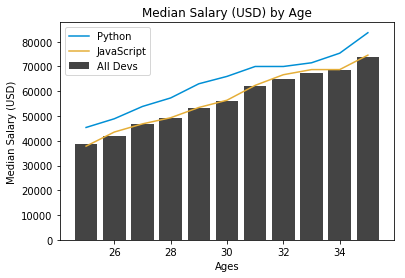

In [11]:
py_dev_y = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]
js_dev_y = [37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583]

plt.bar(ages_x, dev_y, color='#444444', label='All Devs')
plt.plot(ages_x, py_dev_y, color='#008fd5', label='Python')     # the lineplots are overlayed
plt.plot(ages_x, js_dev_y, color='#e5ae38', label='JavaScript')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.legend()
plt.show()

And what if we want to include them as barcharts side by side? It is not as simple as we did with the lineplots (i.e. overlaying new `plt.bar`). It will show up some issues.

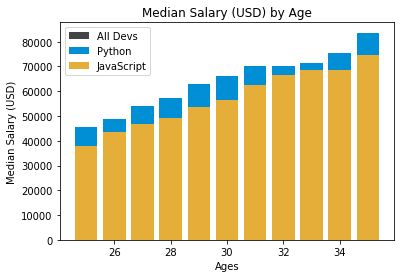

In [12]:
plt.bar(ages_x, dev_y, color='#444444', label='All Devs')
plt.bar(ages_x, py_dev_y, color='#008fd5', label='Python')     
plt.bar(ages_x, js_dev_y, color='#e5ae38', label='JavaScript')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.legend()
plt.show()

We can see it does not look quite right. The bars are not side by side, they are overlapped. We can also note the overlap depends on the order used to plot the bars. That is why javascript overlaps Python and All Devs. The piece of the barcharst we see for Python is just because their median salaries are higher than JavaScript developers median salaries.

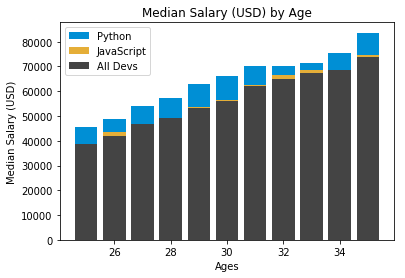

In [13]:
plt.bar(ages_x, py_dev_y, color='#008fd5', label='Python')     
plt.bar(ages_x, js_dev_y, color='#e5ae38', label='JavaScript')
plt.bar(ages_x, dev_y, color='#444444', label='All Devs')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.legend()
plt.show()

And now, since All Devs is the las group added, they overlap all the other bars.

How can we **put the bars side by side**?

Here we need to use `numpy` and use it to grab a range of values for the x axis.

In [15]:
import numpy as np  # in more serious applications all the imports must be at the beginning.

In [17]:
x_indexes = np.arange(len(ages_x))

In [18]:
x_indexes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Instead of using our x values in the `plt` methods, we use the `x_indexes` we created. If we use the indexes as they are, the plot will look very similar to what we produced before. However, we can shift our indexes. It is, we can shift our first bar to the left and our second bar to the right.  
How much should we shift the bars? We should shift our bars the exact width of each bar.

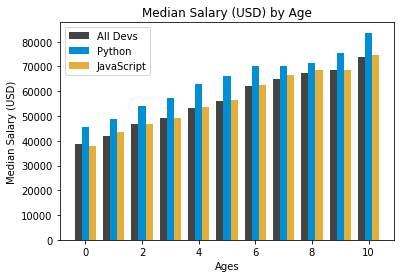

In [21]:
width = 0.25  # explicitly creating width variables. You can experiment with other values.

# Substract and add width to the barcharts. We also have to specify the with in the arguments.
plt.bar(x_indexes - width, dev_y, width = width, color='#444444', label='All Devs')  # shifted to the left
plt.bar(x_indexes, py_dev_y, width = width, color='#008fd5', label='Python')     
plt.bar(x_indexes + width, js_dev_y, width = width, color='#e5ae38', label='JavaScript') # shifted to the right
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.legend()
plt.show()

Now the bars are side-by-side instead of being stacked on top of each other. Note that if we have more bars to put side-by-side we should have our offsets accordingly to this number of bars.  
On the other hand, if we look at the x-axis the label does not reflect our data, but it reflects the `x_axis` being passed to `plt`.  
So, in addition we need to add extra modifications to reflect the changes.

The method that helps us now is `plt.xticks`. We pass `x_indexes` as `ticks` and `ages_x` as `labels`. In other words, at the position of each tick, put the corresponding age label.

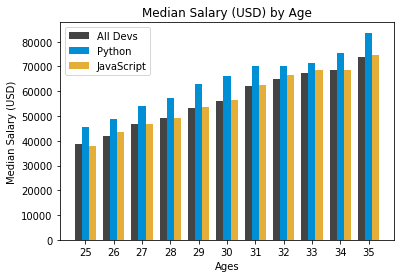

In [23]:
plt.bar(x_indexes - width, dev_y, width = width, color='#444444', label='All Devs')
plt.bar(x_indexes, py_dev_y, width = width, color='#008fd5', label='Python')     
plt.bar(x_indexes + width, js_dev_y, width = width, color='#e5ae38', label='JavaScript')
plt.xticks(ticks=x_indexes, labels=ages_x)
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.legend()
plt.show()

## Horizontal barcharts

Before we get to the part where we produce the horizontal barcharts, we are going to read external data. This data is going to be from a `csv` file. Let's have a look to the first lines of the file

`Responder_id,LanguagesWorkedWith
1,HTML/CSS;Java;JavaScript;Python
2,C++;HTML/CSS;Python
3,HTML/CSS
4,C;C++;C#;Python;SQL
5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA`

We can see the first row contain the column names. The first column is just an ID attached to each person, and the second column includes the languages that the person has worked with. Note we don't have a column for each language, all of them are in the same column separated by `;`.

In this case, we want to produce a barchart of the most popular programming languages.

In [26]:
import csv # default csv module

with open('data/part_02/data.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    
    row = next(csv_reader)  # grabs only first row
    print(row)              # prints the content of the first row

OrderedDict([('Responder_id', '1'), ('LanguagesWorkedWith', 'HTML/CSS;Java;JavaScript;Python')])


We can see the keys are the headers and the values are the responses for that particular person. We can just write the keys if we wanted. There we can see that each programming language is separated by a semi-colon, meaning we can use it to split the content.

In [27]:
with open('data/part_02/data.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    
    row = next(csv_reader)
    print(row['LanguagesWorkedWith'].split(';'))

['HTML/CSS', 'Java', 'JavaScript', 'Python']


In order to produce the barchart for the most popular programming languages, we have to find a way produce a count of each one. This is a so common task that python as an in-built `Counter` function within the `collections` module.

In [28]:
from collections import Counter

with open('data/part_02/data.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    
    language_counter = Counter()  # initializes the Counter

    for row in csv_reader:
        language_counter.update(row['LanguagesWorkedWith'].split(';'))  # it is updated with every row read.
        
print(language_counter)

Counter({'JavaScript': 20463, 'HTML/CSS': 19284, 'SQL': 16467, 'Python': 12618, 'Java': 12329, 'Bash/Shell/PowerShell': 11117, 'C#': 9306, 'PHP': 7950, 'C++': 7076, 'TypeScript': 6389, 'C': 6253, 'Other(s):': 2735, 'Ruby': 2582, 'Go': 2472, 'Assembly': 2017, 'Swift': 1975, 'Kotlin': 1877, 'R': 1717, 'VBA': 1692, 'Objective-C': 1418, 'Scala': 1095, 'Rust': 960, 'Dart': 582, 'Elixir': 445, 'Clojure': 422, 'WebAssembly': 353, 'F#': 327, 'Erlang': 263, 'Bash/Shel': 1})


We can see it not only counted the frequencies but it also sorted them from greatest to smallest. There are a lot of programming languages. In cases like this, we may not want to plot all the languages. Here we are going to keep only the top 15 languages.

A great thing of using a `Counter` is that is has a method that does that very easily for us.

In [30]:
print(language_counter.most_common(15)) # prints 15 most common languages

[('JavaScript', 20463), ('HTML/CSS', 19284), ('SQL', 16467), ('Python', 12618), ('Java', 12329), ('Bash/Shell/PowerShell', 11117), ('C#', 9306), ('PHP', 7950), ('C++', 7076), ('TypeScript', 6389), ('C', 6253), ('Other(s):', 2735), ('Ruby', 2582), ('Go', 2472), ('Assembly', 2017)]


Note that this method returns a list where each element in the list is a tuple. The first element of the tuple is the language and the second is the count.  

Before we try plotting it, we need to put the languages in their own list, and the counts in another. Languages on one axis, counts on the other.

In [32]:
languages = []  # emtpy list that will store languages 
popularity = [] # empty list that will store counts

for item in language_counter.most_common(15):  # loops over a list of tuples
    languages.append(item[0])  # grabs first item and appends to languages
    popularity.append(item[1]) # grabs second item and appends to popularity.

In [35]:
print(languages)
print(popularity)

['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly']
[20463, 19284, 16467, 12618, 12329, 11117, 9306, 7950, 7076, 6389, 6253, 2735, 2582, 2472, 2017]


Now that we have these lists, we can plot them just as we did before.

Text(0, 0.5, 'Number of People Who Use')

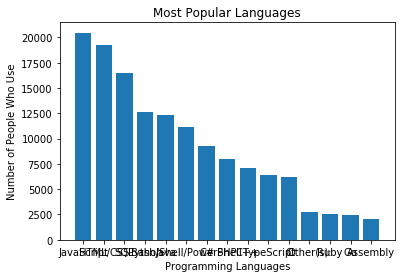

In [36]:
plt.bar(languages, popularity)
plt.title('Most Popular Languages')
plt.xlabel("Programming Languages")
plt.ylabel("Number of People Who Use")

**Problem!** When we have so many categories as here, it is impossible to see which bar corresponds to each category. A horizontal barchart may be more readable. We do that by changing the method to `plt.barh`.

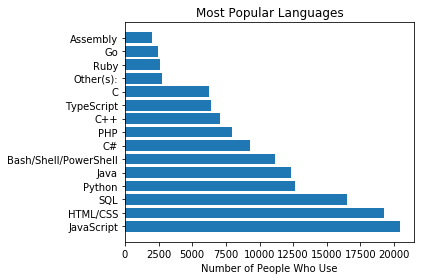

In [42]:
plt.barh(languages, popularity)
plt.title('Most Popular Languages')
plt.xlabel("Number of People Who Use")
plt.tight_layout()
plt.show()

This horizontal barchart is much easier to read than the previous vertical barchart. One issue here is that with the horizontal barchart we may want the most popular languages to be on the top, since we read from top to bottom.  To do so, we can just reverse our lists being passed.

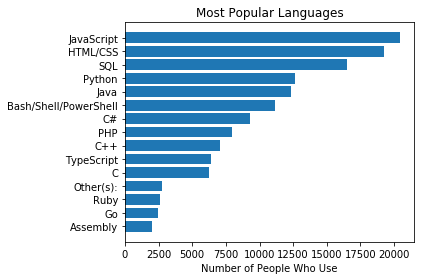

In [43]:
# Note that .reverse() modifies in place.
languages.reverse()
popularity.reverse()

plt.barh(languages, popularity)
plt.title('Most Popular Languages')
plt.xlabel("Number of People Who Use")
plt.tight_layout()
plt.show()

## Bonus 
Here we cover how to read the `csv` files with `pandas`. This is the methodology that will be used in subsequent parts of this tutorial, so it is important to have a first look at it. This is faster and cleaner.

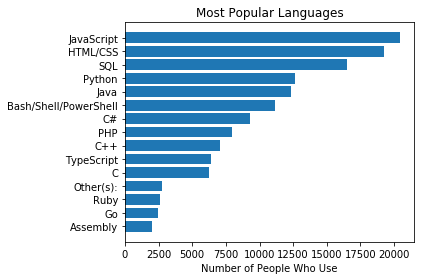

In [49]:
import pandas as pd

data = pd.read_csv('data/part_02/data.csv')
ids = data['Responder_id']                   # set ids variable to the first column in the dataframe
lang_responses = data['LanguagesWorkedWith'] # same with language responses

language_counter = Counter()

for response in lang_responses:
    language_counter.update(response.split(';'))

languages = []
popularity = []

for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

languages.reverse()
popularity.reverse()

plt.barh(languages, popularity)
plt.title('Most Popular Languages')
plt.xlabel("Number of People Who Use")
plt.tight_layout()
plt.show()
    